## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print("The number of rows in this dataset is: {}.".format(df.shape[0]))

The number of rows in this dataset is: 294478.


c. The number of unique users in the dataset.

In [4]:
print("The number of unique users in the dataset is: {}.".format(df["user_id"].nunique()))

The number of unique users in the dataset is: 290584.


d. The proportion of users converted.

In [5]:
print("The proportion of users who converted is: {}.".format(df["converted"].mean().round(2)))

The proportion of users who converted is: 0.12.


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
no_match = df.query('(group == "control" & landing_page == "new_page") \
         | (group == "treatment" & landing_page == "old_page")')

print("The number of mismatches is: {}.".format(no_match.shape[0]))

The number of mismatches is: 3893.


f. Do any of the rows have missing values?

In [7]:
df.info() # There are no rows with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Dropping the respective rows
df2 = df.drop(labels=no_match.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print("The number of unique user ids in df2 is: {}.".format(df2["user_id"].nunique()))

The number of unique user ids in df2 is: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'])].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)] # We can observe consistency in the data   

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Dropping the duplicated user id
df2.drop(labels=[2893], inplace=True)

In [14]:
# Checking to see if the duplicated user id has been dropped
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print("The probability of an individual converting is: {}.".format(df2["converted"].mean()))

The probability of an individual converting is: 0.11959708724499628.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control = df2.query('group == "control"')

print("The probability of an individual converting in the control group is: {}.".format(control.converted.mean()))

The probability of an individual converting in the control group is: 0.1203863045004612.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment = df2.query('group == "treatment"')

print("The probability of an individual converting in the treatment group is: {}.".format(treatment.converted.mean()))

The probability of an individual converting in the treatment group is: 0.11880806551510564.


d. What is the probability that an individual received the new page?

In [18]:
new_page_count = df2.query('landing_page == "new_page"').shape[0]
total_count = df2.shape[0]

print("The probability of receiving a new page is: {}.".format(new_page_count/total_count))

The probability of receiving a new page is: 0.5000619442226688.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Based on the calculations above, it seems fair that the probability of receiving an old page and a new page are both 50% each. However, there is insufficient evidence to conclude that the new treatment page leads to more conversions, as what has been calculated above are more descriptive values of the dataset, which would not provide the stastical signicance. In fact, just based on the above, the probabilty of an individual converting in the the **control** (individuals shown the old page) is sightly higher than those in the **treatment** (individuals shown the new page) at **0.1204** and **0.1188** respectively.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_{0}: P_{new} - P_{old} \leq 0$$
$$H_{1}: P_{new} - P_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.binomial(1,p_new,n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.binomial(1,p_old,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.00049769478863746774

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
p_diffs = []

for _ in range(10000):
    p_new_1 = np.random.binomial(1,p_new,n_new).mean()
    p_old_1 = np.random.binomial(1,p_old,n_old).mean()
    diffs = p_diffs.append(p_new_1-p_old_1)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [27]:
# Calcuting the actual observed difference in the ab_data.csv dataset
control = df.query('group == "control"').converted.mean()
treatment = df.query('group == "treatment"').converted.mean()
obs_diff = treatment - control

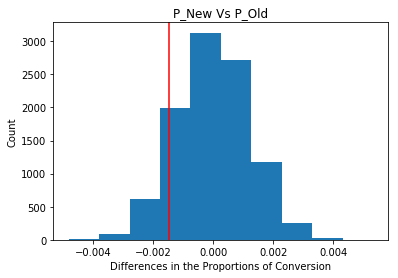

In [28]:
# Plotting the histogram 
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.title('P_New Vs P_Old')
plt.xlabel('Differences in the Proportions of Conversion')
plt.ylabel('Count');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Calculating the p-value
print("The p-value is: {}".format((p_diffs > obs_diff).mean()))

The p-value is: 0.8871


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value calculated above is called the p-value. Its official definition is: "When $H_{0}$ is true, it is the probability of observing a statistic, or one more extreme in favour of the alternative."

In other words, it is the probability that a sample could have been drawn from the population being tested given that the null hypothesis is true. In the case above, the p-value calculated is 0.8871, this indicates that there is not enough statistical evidence to reject the null.

Thus, it is recommended that the company sticks to the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" & converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
# Computing the test statistic and displaying the z-score
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

z_score

-1.3109241984234394

In [32]:
# Displaying the p-value
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Earlier it was mentioned the significance level ($\alpha$) is 0.05. Thus, with a z-score of -1.131, which is below the critical value of an upper-tail critical test of 1.645 and a p-value of 0.9051, just like the findings in parts **j.** and **k.**, we do not have statistical evidence to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

As this is a prediction of only two possible outcomes, either a conversion or no conversion, the appropriate regression approach in this case would be the **logistic regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Adding the intercept
df2["intercept"] = 1

# Adding the dummy variables
df2[["control", "treatment"]] = pd.get_dummies(df["group"])

In [34]:
# Dropping the control column
df2.drop(labels="control", axis=1, inplace=True)

# Changing the name of the treatment column to ab_page
df2.rename(columns={"treatment": "ab_page"}, inplace=True)

In [35]:
# Checking to see if the intercept and the dummy variables have been added correctly df2
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
# Assigning the response and explanatory variables
y = df2["converted"]
x = df2[["intercept", "ab_page"]]

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
log_mod = sm.Logit(y,x)
res = log_mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        08:06:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

The p-value here is 0.190. It is different from the value found in **Part II** due to the nature of the logistic regression. The hypothesis test in this model is as follows:

$$H_{0}: P_{new} - P_{old} = 0$$
$$H_{1}: P_{new} - P_{old} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Advantage** <br><br>
Based on the dataset above, the other explanatory variable that might have affected the response is the timestamp. For example, it could be a factor that a person is more likely to convert on a weekend then a weekday, as practically, they would have more time to browse the website and make a decision. Thus, this allows us to account for more variables and determine the model that best fits. <br>

**Disadvantage** <br><br>
This could introduce more ambiguity into the analysis as well as, increase the probability of things like outliers and correlated errors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
# Reading the coutries dataframe
df_countries = pd.read_csv('./countries.csv')

In [39]:
# Explore the countries dataframe
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# Merging the datasets
df3 = pd.merge(df2, df_countries, how='inner', left_on='user_id', right_on='user_id')

In [41]:
# Exploring the merged dataset
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
# This writtens a tuple for the dimensions of the dataset
df3.shape

(290584, 8)

In [43]:
# Viewing the values in the country column
df3["country"].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [44]:
# Creating and adding the dummy variables
df3[["CA", "UK", "US"]] = pd.get_dummies(df3["country"])

In [45]:
# Check to see if the dummy variables have been added correctly
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [46]:
# Creating the logistic regression model
y = df3["converted"]
x = df3[["intercept", "UK", "US"]]

logmod = sm.Logit(y,x)
res = logmod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:               1.521e-05
Time:                        08:06:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

The above logit regression results shows p-values of 0.074 and 0.129 for people residing in the UK and US respectively. As our alpha is 0.05, it can be stated that the country a person is from has no statistical significance for us to reject the null.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Provide the summary results, and your conclusions based on the results.

In [47]:
# Creating the logistic regression model
y = df3["converted"]
x = df3[["intercept", "UK", "US", "ab_page"]]

logmod = sm.Logit(y,x)
res = logmod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:               2.323e-05
Time:                        08:06:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

The p-values shown here are again, all above the alpha level of 0.05, hence, we do not have enough statistical evidence to reject the null. 

## Additional Timestamp Analysis
Here we will take a look at the signifance the day of the week has on whether an individual converts, we will compare weekdays and weekends.

In [48]:
# Converting the timestramp string to a datetime object
df3["timestamp"] = pd.to_datetime(df3["timestamp"])

In [49]:
# Observing the dataset again
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [50]:
# Checking to see the conversion of dtype for timestamp
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 11 columns):
user_id         290584 non-null int64
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
CA              290584 non-null uint8
UK              290584 non-null uint8
US              290584 non-null uint8
dtypes: datetime64[ns](1), int64(3), object(3), uint8(4)
memory usage: 18.8+ MB


In [51]:
# Adding a day of week column
df3["day_of_week"] = df3["timestamp"].dt.dayofweek

In [52]:
# Checking to see if the column has been added correctly
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,day_of_week
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,5
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,3
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,6
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,5


In [53]:
# Converts the numbers 0 - 4 to Weekday and 5 & 6 to Weekend
df3["day_of_week"] = df3["day_of_week"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

In [54]:
# Checking to see if the above has been applied correctly
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,day_of_week
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,Weekend
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,Weekday
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,Weekday
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,Weekend
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,Weekend


In [61]:
# Getting the dummy variables
df3[["weekday", "weekend"]] = pd.get_dummies(df3["day_of_week"])

In [62]:
# Checking to see if the dummies have been added properly
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,day_of_week,weekday,weekend
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,Weekend,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,Weekday,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,Weekday,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,Weekend,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,Weekend,0,1


In [63]:
# Setting up and instantiate the logistic regression
y = df3["converted"]
x = df3[["intercept", "weekday"]]

log = sm.Logit(y,x)
res = log.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Feb 2019   Pseudo R-squ.:               1.227e-08
Time:                        08:12:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.9593
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9958      0.011   -182.728      0.000      -2.017      -1.974
weekday       -0.0007      0.013     -0.051      0.959      -0.026       0.024
==============================================================================
"""

Based on the p-value above of 0.959, it can be determined that it is unlikely the day of the week would impact the conversion rate. Thus, we do not have enough statistical evidence to reject the null.

## Exploring Further


In [76]:
# Sorting dataframe by timestamp and viewing the head of the dataset
df3.sort_values(by=["timestamp"], inplace=True)
df3.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,day_of_week,weekday,weekend
129421,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1,1,US,0,0,1,Weekday,1,0


In [75]:
# View the head of the dataset
df3.tail(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,day_of_week,weekday,weekend
191059,920411,2017-01-24 13:41:54.460509,control,old_page,0,1,0,CA,1,0,0,Weekday,1,0


As we can see the experient ran for less than a month, meaning there could be a factor of change aversion for existing customers to the website. Thus, it can be recommended that the company runs the experiment longer to allow the effect of change aversion to subside, which will result in a better analysis on the data.

## Conclusion

In conclusion, based on the various tests done above, it could be concluded that there is not enough statistical evidence to rejust the null. Not only that, there is also no practical significance to do so, with the difference in proportions of conversions between the old and new being approximately -0.0005. 

Thus, the company should stick with the old page.